In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
purchase_behaviour = pd.read_csv("purchase_behaviour.csv")
transaction_data = pd.read_csv("transaction_data.csv")

In [3]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
# Merge datasets on Lylty_card_nbr
merged_data = transaction_data.merge(purchase_behaviour, on="LYLTY_CARD_NBR", how="left")

In [6]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [7]:
# Basic Data Overview
print("Purchase Behaviour Info:")
print(purchase_behaviour.info())
print("Transaction Data Info:")
print(transaction_data.info())
print("Merged Data Info:")
print(merged_data.info())

Purchase Behaviour Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
Transaction Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-nul

In [8]:
# Check for missing values
print("Missing Values:")
print(merged_data.isnull().sum())

Missing Values:
DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [20]:
# Customer Segmentation
total_revenue = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])['TOT_SALES'].sum().reset_index()
total_revenue = total_revenue.sort_values(by='TOT_SALES', ascending=False)
print("Revenue by Customer Segment:")
print(total_revenue)

Revenue by Customer Segment:
                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6           OLDER FAMILIES           Budget  168363.25
19   YOUNG SINGLES/COUPLES       Mainstream  157621.60
13                RETIREES       Mainstream  155677.05
15          YOUNG FAMILIES           Budget  139345.85
9    OLDER SINGLES/COUPLES           Budget  136769.80
10   OLDER SINGLES/COUPLES       Mainstream  133393.80
11   OLDER SINGLES/COUPLES          Premium  132263.15
12                RETIREES           Budget  113147.80
7           OLDER FAMILIES       Mainstream  103445.55
14                RETIREES          Premium   97646.05
16          YOUNG FAMILIES       Mainstream   92788.75
1   MIDAGE SINGLES/COUPLES       Mainstream   90803.85
17          YOUNG FAMILIES          Premium   84025.50
8           OLDER FAMILIES          Premium   81958.40
18   YOUNG SINGLES/COUPLES           Budget   61141.60
2   MIDAGE SINGLES/COUPLES          Premium   58432.65
20   YOUNG SINGLES/COUPLES          

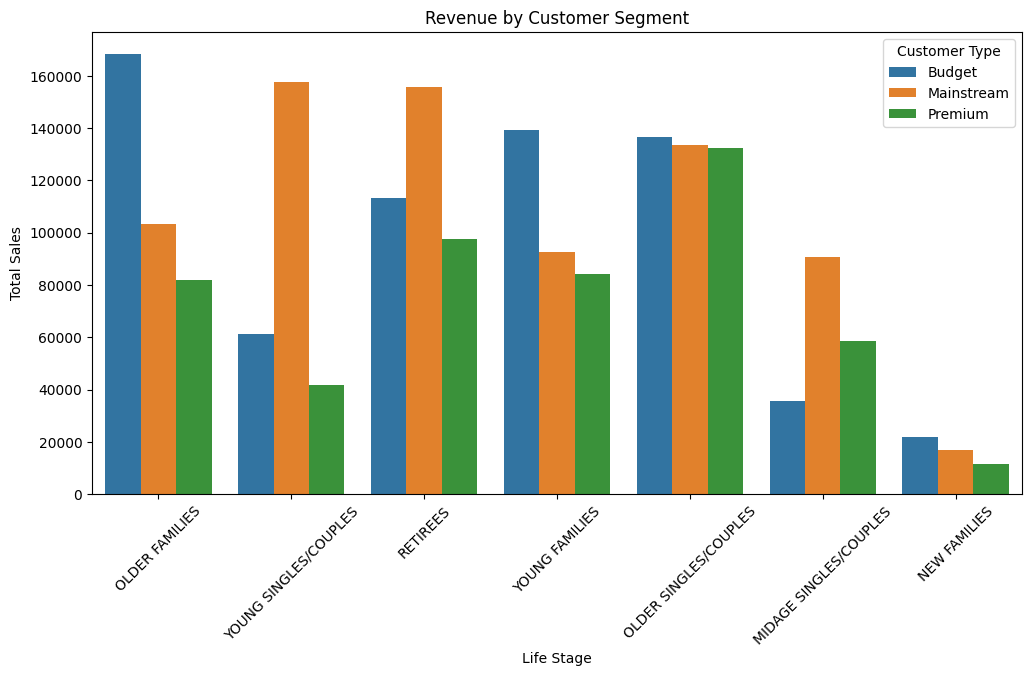

In [10]:
# Visualization of Revenue by Segment
plt.figure(figsize=(12,6))
sns.barplot(data=total_revenue, x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER")
plt.xticks(rotation=45)
plt.title("Revenue by Customer Segment")
plt.ylabel("Total Sales")
plt.xlabel("Life Stage")
plt.legend(title="Customer Type")
plt.show()

In [11]:
# Identifying Most Profitable Products
top_products = merged_data.groupby("PROD_NAME")['TOT_SALES'].sum().reset_index()
top_products = top_products.sort_values(by='TOT_SALES', ascending=False).head(3)
print("Top 3 Most Profitable Products:")
print(top_products)

Top 3 Most Profitable Products:
                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g    40352.0
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
77  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


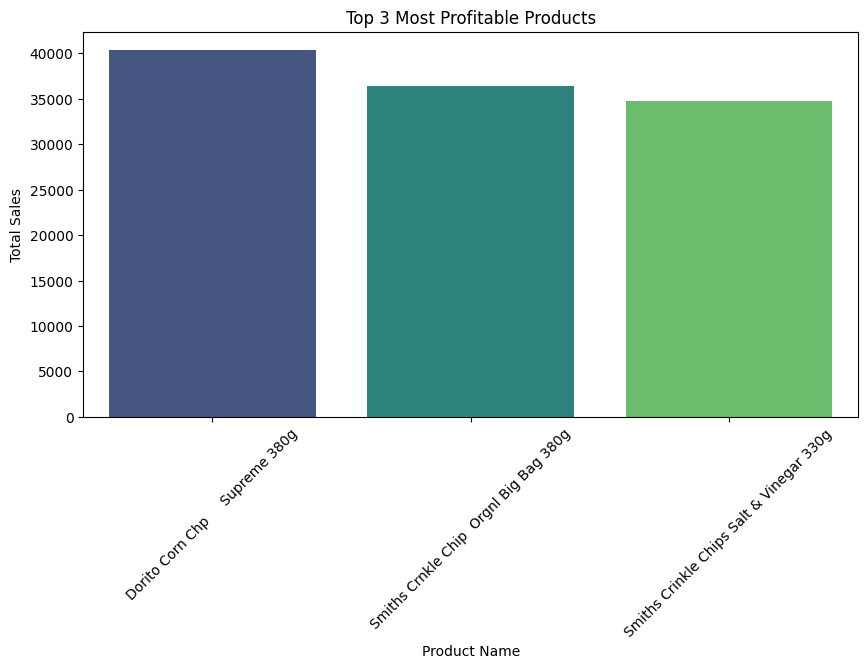

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_products, x="PROD_NAME", y="TOT_SALES", palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 3 Most Profitable Products")
plt.ylabel("Total Sales")
plt.xlabel("Product Name")
plt.show()

In [18]:
# Identifying Most Loyal Customers
print("# Most Loyal Customers")
loyal_customers = merged_data.groupby("LYLTY_CARD_NBR")["TXN_ID"].count().reset_index()
loyal_customers = loyal_customers.sort_values(by="TXN_ID", ascending=False).head(10)
loyal_customer_profiles = loyal_customers.merge(purchase_behaviour, on="LYLTY_CARD_NBR", how="left")
print(loyal_customer_profiles)

# Most Loyal Customers
   LYLTY_CARD_NBR  TXN_ID              LIFESTAGE PREMIUM_CUSTOMER
0          162039      18         OLDER FAMILIES       Mainstream
1          172032      18  YOUNG SINGLES/COUPLES       Mainstream
2           13138      17         YOUNG FAMILIES       Mainstream
3          116181      17         YOUNG FAMILIES          Premium
4          128178      17         OLDER FAMILIES       Mainstream
5          230078      17         OLDER FAMILIES           Budget
6          105026      16         YOUNG FAMILIES           Budget
7          129050      16         YOUNG FAMILIES          Premium
8          109036      16  OLDER SINGLES/COUPLES          Premium
9          222242      16         OLDER FAMILIES       Mainstream


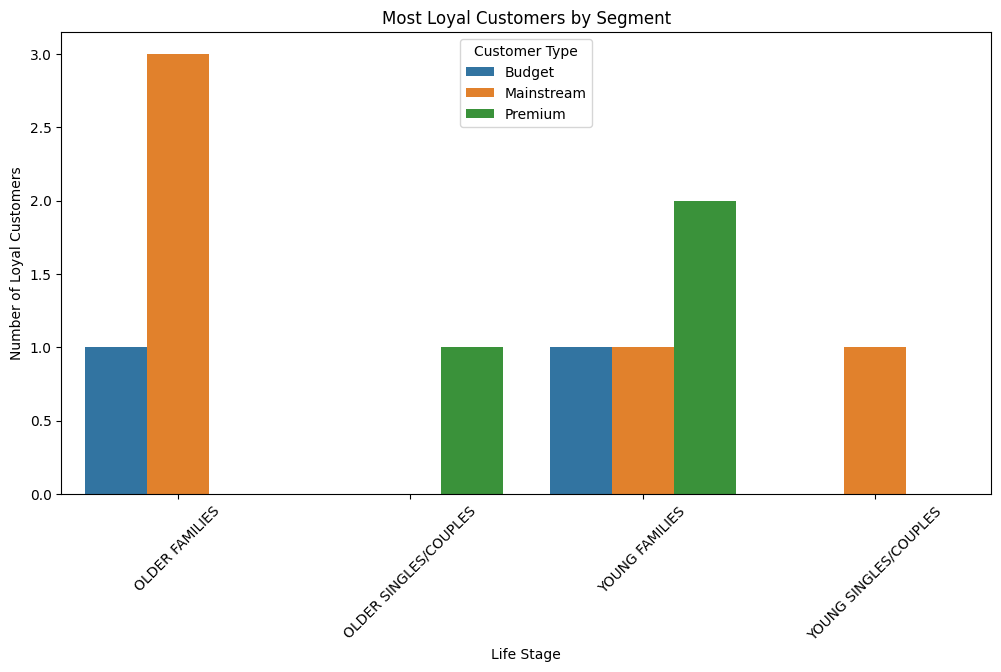

In [19]:
loyalty_counts = loyal_customer_profiles.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).size().reset_index(name='Count')
plt.figure(figsize=(12,6))
sns.barplot(data=loyalty_counts, x="LIFESTAGE", y="Count", hue="PREMIUM_CUSTOMER")
plt.xticks(rotation=45)
plt.title("Most Loyal Customers by Segment")
plt.ylabel("Number of Loyal Customers")
plt.xlabel("Life Stage")
plt.legend(title="Customer Type")
plt.show()

In [15]:
# Hypothesis on Loyal Customers' Preferences
print("# Hypothesis on Loyal Customers' Preferences")
print("- Most loyal customers belong to Older Families & Young Families, suggesting bulk buying for households.")
print("- Premium & Mainstream buyers show higher loyalty, indicating preference for quality over price.")
print("- Chips/snacks are likely a habitual purchase, used for gatherings, kids, or weekend leisure.")

# Hypothesis on Loyal Customers' Preferences
- Most loyal customers belong to Older Families & Young Families, suggesting bulk buying for households.
- Premium & Mainstream buyers show higher loyalty, indicating preference for quality over price.
- Chips/snacks are likely a habitual purchase, used for gatherings, kids, or weekend leisure.


In [13]:
# Average Spending Per Customer by Segment
avg_spending = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])['TOT_SALES'].mean().reset_index()
print("Average Spending Per Customer Segment:")
print(avg_spending)

Average Spending Per Customer Segment:
                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   7.074661
1   MIDAGE SINGLES/COUPLES       Mainstream   7.647284
2   MIDAGE SINGLES/COUPLES          Premium   7.112056
3             NEW FAMILIES           Budget   7.297321
4             NEW FAMILIES       Mainstream   7.317806
5             NEW FAMILIES          Premium   7.231655
6           OLDER FAMILIES           Budget   7.269570
7           OLDER FAMILIES       Mainstream   7.262395
8           OLDER FAMILIES          Premium   7.322945
9    OLDER SINGLES/COUPLES           Budget   7.430315
10   OLDER SINGLES/COUPLES       Mainstream   7.282116
11   OLDER SINGLES/COUPLES          Premium   7.449766
12                RETIREES           Budget   7.443445
13                RETIREES       Mainstream   7.252262
14                RETIREES          Premium   7.456174
15          YOUNG FAMILIES           Budget   7.287201
16          YOUNG FAMILIES

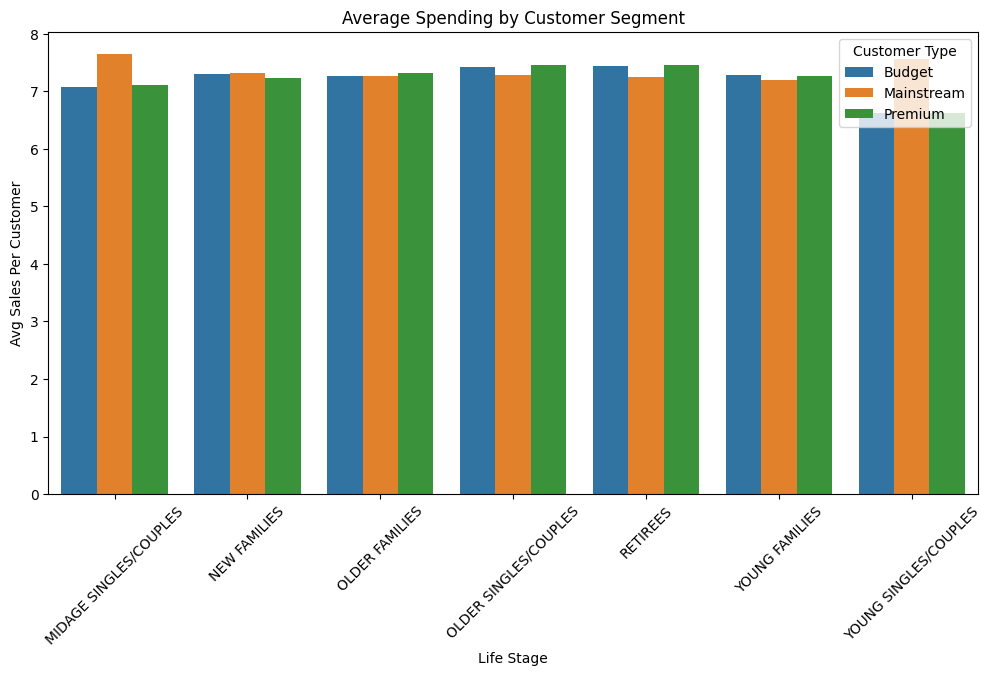

In [14]:
# Visualization of Spending Behavior
plt.figure(figsize=(12,6))
sns.barplot(data=avg_spending, x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER")
plt.xticks(rotation=45)
plt.title("Average Spending by Customer Segment")
plt.ylabel("Avg Sales Per Customer")
plt.xlabel("Life Stage")
plt.legend(title="Customer Type")
plt.show()

In [16]:
# Additional Insights
print("# Additional Insights")
print("- The most popular products are large-sized packs (330g-380g), implying bulk or family consumption.")
print("- Smiths Crinkle Chips & Dorito Corn Chips are highly preferred, showing strong brand loyalty.")
print("- The Salt & Vinegar flavor has high revenue, suggesting a strong preference for tangy/savory snacks.")
print("- There may be an opportunity to introduce new flavors or combo packs for loyal customers.")

# Additional Insights
- The most popular products are large-sized packs (330g-380g), implying bulk or family consumption.
- Smiths Crinkle Chips & Dorito Corn Chips are highly preferred, showing strong brand loyalty.
- The Salt & Vinegar flavor has high revenue, suggesting a strong preference for tangy/savory snacks.
- There may be an opportunity to introduce new flavors or combo packs for loyal customers.
